# Chapter 4: Transforming vectors and graphics

**NOTE** For most of the examples in this chapter, the code is in other .py files in this directory, rather than directly in this Notebook.  You can run the other files in the notebook below, and a PyGame window will open up.  For instance `!python script.py` runs `script.py` as if you're running it from the command line. When you're done admiring the graphics the scripts create, you can close the window and the Jupyter cell will finish computing.

Make sure to follow the instructions from Appendix C before beginning this chapter, including

`pip install PyGame`

`pip install PyOpenGL`

# 4.1 Transforming 3D objects

## 4.1.1 Drawing a transformed object

symbol **`!`** tells jypiter notebook to execute script in command lie 

In [1]:
!python draw_teapot.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
!python scale_teapot.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
!python scale_translate_teapot.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## 4.1.2 Composing vector transformations

When function ends with `()` -- *parentheses*, it means that function will be executed  
* [Programming Terms: First-Class Functions](https://www.youtube.com/watch?v=kr0mpwqttM0)  
* [Currying - Pycon Africa](https://www.youtube.com/watch?v=L3G7BH7n0K0&list=LL4vFTVTAJuWCzJysoHgHzkA&index=3)  
* [Currying - python-course](https://www.python-course.eu/currying_in_python.php#General-Idea)  
* [Currying in Python](https://mtomassoli.wordpress.com/2012/03/18/currying-in-python/)  

We can write a general-purpose compose function that takes two Python functions (vector transformations for instance) and returns a new function, which is their composition:

In [1]:
def compose(f1,f2):
    def new_function(input):
        return f1(f2(input))
    return new_function

```
def scale2_then_translate1left(v):    
      return translate1left(scale2(v))
```
      
Instead of defining scale2_then_translate1left as its own function, we could write:  

`scale2_then_translate1left = compose(translate1left, scale2)`

this is called *composition of function*

**The composition of two functions is a chaining process in which the output of the inner function becomes the input of the outer function.**

In [2]:
def square(x):
    return x**2
def adding(x):
    return x+x

In [3]:
square_adding = compose(square, adding)
square_adding(1)

4

In [4]:
from vectors import scale 

def scale2(v): 
    return scale(2.0, v)

In [5]:
def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in triangle]
        for triangle in polygons
    ]

In [6]:
from teapot import load_triangles

polygon_map(scale2, load_triangles())[0]

[(1.4, 1.0521480000000003, 0.0),
 (1.2734839999999998, 1.124108, -0.541836),
 (1.2915, 1.0521480000000003, -0.5495)]

In [7]:
from draw_model import draw_model

#draw_model(polygon_map(scale2, load_triangles()))

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
def scale_by(scalar):
    def new_function(v):
        return scale(scalar, v)
    return new_function

In [9]:
scale2 = scale_by(2)
scale2((1,1,1))

(2, 2, 2)

In [10]:
scale_by(2)((1,1,1))

(2, 2, 2)

In [11]:
from vectors import add

def translate_by(xform):
    def new_function(v):
        return add((xform), (v))
    return new_function

In [12]:
translate2 = translate_by((0,5,0))
translate2((1,1,1))

(1, 6, 1)

In [13]:
translate_by((0,5,0))((1,1,1))

(1, 6, 1)

## 4.1.3 Rotating an object about an axis

You already saw how to do rotations in 2D in chapter 2: you convert the Cartesian coordinates to polar coordinates, increase or decrease the angle by the rotation factor, and then convert back.

In [14]:
def rotate2d(angle, vector): 
    l,a = to_polar(vector)
    return to_cartesian((l, a+angle))

In [15]:
!python rotate_teapot.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [16]:
def rotate_z(angle, vector): 
    x,y,z = vector 
    new_x, new_y = rotate2d(angle, (x,y)) 
    return new_x, new_y, z

# currying rotate_z()
def rotate_z_by(angle):
    def new_function(vector):
        return rotate_z(angle, vector)
    return new_function

In [17]:
from math import *
from transforms import to_polar, to_cartesian

#draw_model(polygon_map(rotate_z_by(pi/4.), load_triangles()))

In [18]:
from functools import partial

rot_z = partial(rotate_z, pi/2.)

#draw_model(polygon_map(rot_z, load_triangles()))

In [19]:
def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

# currying rotate_x()
def rotate_x_by(angle):
    def new_func(vector):
        return rotate_x(angle, vector)
    return new_func

In [20]:
#draw_model(polygon_map(rotate_x_by(pi/2.), load_triangles()))

!python rotate_teapot_x.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


## 4.1.4 Inventing your own geometric transformations

In [21]:
def strech_x(vector):
    x,y,z = vector
    return (4.*x, y, z)

In [22]:
!python stretch_teapot.py

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [23]:
def stretch_y(vector):
    x,y,z = vector
    return (x, 2.*y, z)

#draw_model(polygon_map(stretch_y, load_triangles()))

In [24]:
def stretch_z(vector):
    x,y,z = vector
    return (x, y*y*y, z)

#draw_model(polygon_map(stretch_z, load_triangles()))

In [25]:
def slant_xy(vector):
    x,y,z = vector
    return (x+y, y, z)

#draw_model(polygon_map(slant_xy, load_triangles()))

## 4.1.5 Exercises

**Exercise 4.1:** Implement a `translate_by` function referred to in section 4.1.2, taking a translation vector as an input and returning a translation function as an output.

In [26]:
def translate_by(vector1):
    def new_function(vector2):
        return add(vector1, vector2)
    return new_function

In [27]:
translate_by_1 = translate_by((1,1,1))

In [28]:
#draw_model(polygon_map(translate_by_1, load_triangles()))

**Exercise 4.6:** Modify the `compose(f,g)` function to `compose(*args)`, which takes several functions as arguments and returns a new function that is their composition.

In [29]:
def adding(*args):
    print(args) #original
    print(*args) #unpacked
    return sum(args)

adding(4,3,2,1)

(4, 3, 2, 1)
4 3 2 1


10

In [30]:
def compose(*args):
    def new_function(input):
        state = input
        for f in reversed(args):
            state = f(state)
        return state
    return new_function

In [31]:
scale_add = compose(scale_by(2), translate_by((1,1,1)))
scale_add((2,2,2))

(6, 6, 6)

In [32]:
def prepend(string):
    def new_function(input):
        return string + input
    return new_function

In [33]:
f = compose(prepend('P'), prepend('y'), prepend('t'))
f('hon')

'Python'

**Exercise 4.2:** Render the teapot translated by 20 units in the negative z direction. What does the resulting image look like?


In [34]:
translate_z = translate_by((0,0,-20))
#draw_model(polygon_map(translate_z, load_triangles()))

**Mini-project 4.3:** What happens to the teapot when you scale every vector by a scalar between 0 and 1? What happens when you scale it by a factor of -1?

In [35]:
#draw_model(polygon_map(scale_by(0.5), load_triangles()))

In [36]:
#draw_model(polygon_map(scale_by(-1), load_triangles()))

**Exercise 4.4:** First apply translate1left to the teapot and then apply scale2. How is the result different from the opposite order of composition? Why?

In [37]:
trans_scale = compose(translate_by((-1,0,0)), scale_by(2))
#draw_model(polygon_map(trans_scale, load_triangles()))

In [38]:
scale_trans = compose(scale_by(2), translate_by((-1,0,0)))
#draw_model(polygon_map((scale_trans), load_triangles()))

**Exercise 4.7:** Write a curry2(f) function that takes a Python function f(x,y) with two arguments and returns a curried version. For instance, once you write g = curry2(f), the two expressions f(x,y) and g(x)(y) should return the same result.

In [39]:
def curry2(f):
    def new_function1(input1):
        def new_function2(input2):
            return f(input1, input2)
        return new_function2
    return new_function1

In [40]:
r = (1,0,0)
s = 5

scale_curried = curry2(scale)
scale_curried(s)(r), scale(s,r)

((5, 0, 0), (5, 0, 0))

In [41]:
scale_by = curry2(scale)
scale_by(2)((1,2,3))

(2, 4, 6)

**Exercise 4.8:** Without running it, what is the result of applying the transformation compose(rotate_z_by(pi/2),rotate_x_by(pi/2))? What if you switch the order of the composition?

In [74]:
#draw_model(polygon_map(rotate_z_by(pi/2), load_triangles()))
#draw_model(polygon_map(rotate_x_by(pi/2), load_triangles()))
#draw_model(polygon_map(compose(rotate_z_by(pi/2), rotate_x_by(pi/2)), load_triangles()))
#draw_model(polygon_map(compose(rotate_x_by(pi/2), rotate_z_by(pi/2)), load_triangles()))

**Exercise 4.9:** Write a function stretch_x(scalar,vector) that scales the target vector by the given factor but only in the x direction. Also write a curried version stretch_x_by so that stretch_x_by(scalar)(vector) returns the same result.

In [78]:
def stretch_x(scalar, vector):
    x,y,z = vector
    return x*scalar, y, z

In [79]:
stretch_x(5, (1,1,1))

(5, 1, 1)

In [84]:
def strecth_x_by(scalar):
    def new_function(vector):
        return stretch_x(scalar, vector)
    return new_function

In [86]:
strecth_x_by(5)((1,1,1))

(5, 1, 1)

# 4.2 Linear transformations

Along with vectors, linear transformations are the other main objects of study in linear algebra. Linear transformations are special transformations where vector arithmetic looks the same before and after the transformation.

## 4.2.1 Preserving vector arithmetic



Linear transformation

A linear transformation is a vector transformation `T` that **preserves vector addition and scalar multiplication**. That is, for any input vectors `u` and `v`, we have:

`T(u) + T(v) = T(u + v)`

and for any pair of a scalar `s` and a vector `v`, we have:

`T(sv) = sT(v)`



## 4.2.2 Picturing linear transformations

Exaples are in the book.

## 4.2.3 Why linear transformations?



Because linear transformations preserve vector sums and scalar multiples, they also preserve a broader class of vector arithmetic operations. The most general operation is called a ***linear combination***. A linear combination of a collection of vectors is a sum of scalar multiples of them. For instance, one linear combination of two vectors `u` and v would be `3u − 2v`. Given three vectors `u`, `v`, and `w`, the expression `0.5u − v + 6w` is a ***linear combination*** of `u`, `v`, and `w`. Because linear transformations preserve vector sums and scalar multiples, these preserve linear combinations as well.





We can restate this fact algebraically. If you have a collection of `n` vectors, `v1`, `v2`, …, `vn`, as well as any choice of `n` scalars, `s1`, `s2`, `s3`, …, `sn`, a linear transformation `T` preserves the linear combination:


`T(s1v1 + s2v2 + s3v3 + … + snvn) = s1T(v1) + s2T(v2) + s3T(v3) + … + snT(vn)`



The key idea here is that every point on a line segment connecting two vectors `u` and `v` is a **weighted average** and, therefore, a ***linear combination*** of points `u` and `v`.

`su + (1 − s)v`

`0 < s < 1`

A linear transformation `T` takes every point on the line segment connecting `u` and `v` to a point on the line segment connecting `T(u)` and `T(v)`. This is a key property of linear transformations: they send every existing line segment to a new line segment. Because our 3D models are made up of polygons and polygons are outlined by line segments, linear transformations can be expected to preserve the structure of our 3D models to some extent.

## 4.2.4 Computing linear transformations

Vector `v(4, 3, 5)` can be decomposed as a sum `(4, 0, 0) + (0, 3, 0) + (0, 0, 5)`. This makes it easy to picture how far the vector extends in each of the three dimensions of the space that we’re in. 

We can decompose this even further into a linear combination `(4, 3, 5) = 4 · (1, 0, 0) + 3 · (0, 1, 0) + 5 · (0, 0, 1)`  

This might seem like a boring fact, but it’s one of the profound insights from linear algebra: any 3D vector can be decomposed into a linear combination of three vectors `(1, 0, 0)`, `(0, 1, 0)`, and `(0, 0, 1)`. The scalars appearing in this decomposition for a vector v are exactly the coordinates of v.

The three vectors `(1, 0, 0)`, `(0, 1, 0)`, and `(0, 0, 1)` are called the ***standard basis*** for three-dimensional space. These are denoted `e1`, `e2`, and `e3`, so we could write the previous linear combination as `(4, 3, 5) = 4 e1 + 3 e2 + 5 e3`. 

When we’re working in 2D space, we call `e1 = (1, 0)` and `e2 = (0, 1)`; so, for example `(7, -4) = 7 e1 − 4 e2`


Because linear transformations respect linear combinations, all we need to know to compute a linear transformation is how it affects standard basis vectors!

In [5]:
from draw_model import draw_model
from teapot import load_triangles
from vectors import add,scale
from transforms import *

Ae1 = (1,1,1)
Ae2 = (1,0,-1) 
Ae3 = (0,1,1) 

def apply_A(v):
    return add(
        scale(v[0], Ae1), 
        scale(v[1], Ae2), 
        scale(v[2], Ae3) 
    ) 

#draw_model(polygon_map(apply_A, load_triangles()))

**Exercise 4.10:** Considering S again, the vector transformation that squares all coordinates, show algebraically that `S(sv) = sS(v)` does not hold for all choices of scalars `s` and 2D vectors `v`.

**Solution:** Let transformation $S=(x^{2}, y^{2})$, vector $v=(x,y)$ and scalar $s$.  
Then $sv = (sx, sy)$ and $S(sv) = (s^{2}x^{2}, s^{2}y^{2}) = s^{2}(x^{2}, y^{2}) = s^{2}S(v)$.  
For most values of $s$ and most vectors $v$, $s^{2}S(v) \ne sS(v)$  

A specific example that $S$ is not linear transformation when $s=2$ and $v=(1,1,1)$:  

$S(sv)= 4(1,1,1) = (4,4,4)$  
$sS(v)= 2(1,1,1) = (2,2,2)$  


**Exercise 4.11:** Suppose `T` is a vector transformation and `T(0) ≠ 0`, where `0` represents the vector with all coordinates equal to zero. Why is T not linear according to the definition?

**Solution:** For any vector $v$, $v + 0 = v$. To preserve vector addition it should be that $T(v + 0) = T(v) + T(0)$.  
Because $T(v + 0) = T(v)$ this requires that $T(v) = T(v) + T(0)$ or $T(0) = 0$.    
Given taht this is not the case, $T$ cannot be linear.

**Exercise 4.12:** The *identity transformation is the vector transformation that returns the same vector it is passed. It is denoted with a capital `I`, so we could write its definition as `I(v) = v` for all vectors `v`. Explain why `I` is a linear transformation.*


**Solution:** For any vectors $v$ and $w$, $I(v + w) = v + w = I(v) + I(w)$, and for any scalar $s$, $I(sv) = sv = s · I(v)$. These equalities show that the identity transformation preserves vector sums and scalar multiples.


**Exercise 4.13:** What is the midpoint between (5, 3) and (-2, 1)? Plot all three of these points to see that you are correct.

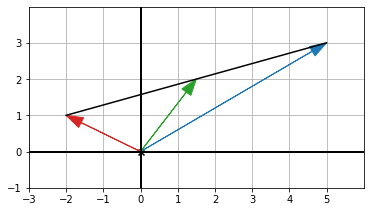

In [14]:
from draw2d import *
from vectors import *

u = (5, 3)
v = (-2, 1)

midpoint = scale(0.5, add(u,v))

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=red),
    Arrow2D(midpoint, color=green),
    Segment2D(u, v, color=black)
)

**Exercise 4.14:** Consider again the non-linear transformation S(v) sending v = (x, y) to (x2, y2). Plot all 36 vectors v with integer coordinates 0 to 5 as points using the drawing code from chapter 2 and then plot S(v) for each of them. What happens geometrically to vectors under the action of S?


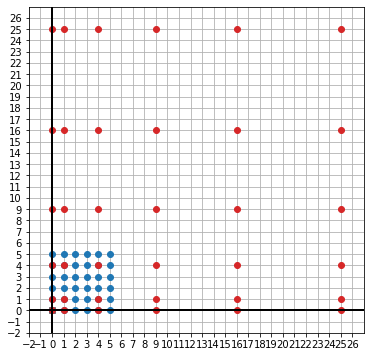

In [24]:
vectors = [(x,y) for x in range(0,6) for y in range(0,6)]
transformed_vectors = [(x**2, y**2) for x,y in vectors]

draw2d(
    Points2D(*vectors, color=blue),
    Points2D(*transformed_vectors, color=red),
)

**Mini-project 4.15:** Property-based testing is a type of unit testing that involves inventing arbitrary input data for a program and then checking that the outputs satisfy desired conditions. There are popular Python libraries like Hypothesis (available through pip) that make it easy to set this up. Using your library of choice, implement property-based tests that check if a vector transformation is linear.

In [101]:
from transforms import *
from random import *

def random_vector(start, end, dimension):
    vector = []
    for i in range(0,dimension):
        vector.append(uniform(start,end))
    return tuple(vector)

def random_vectors(end):
    n = range(end)
    return [(random_vector(-10,10,3), random_vector(-10,10,3)) for i in n for j in n]

def round_by(value):
    def new_function(input):
        return round(input, value)
    return new_function

round_by_3 = round_by(3)

def is_linear_xform(xform, vectors, scalar):
    for vector_pair in vectors:
        u,v = vector_pair
        # check if addition is preserved
        # T(u + v) = T(u) + T(v)
        Ta1 = tuple(map(round_by_3, xform(add(u,v))))
        Ta2 = tuple(map(round_by_3, add(xform(u), xform(v))))
        assert Ta1 == Ta2, 'addition is not preserved'
        # check if scaling is preserved
        # T(sv) = sT(v)
        Ts1 = tuple(map(round_by_3, (xform(scale(scalar, u)))))
        Ts2 = tuple(map(round_by_3, (scale(scalar, xform(u)))))
        assert Ts1 == Ts2 , 'scaling is not preserved'
    return f'This is linear transformation'

In [102]:
scale_by_2 = scale_by(2)

is_linear_xform(scale_by_2, random_vectors(1), 2)

'This is linear transformation'

In [103]:
def pow2(vector):
    x,y,z = vector
    return x**2, y**2, z**2

is_linear_xform(pow2, random_vectors(100), -1)

AssertionError: addition is not preserved

In [104]:
rotate_x_by_1= rotate_x_by(1)

is_linear_xform(rotate_x_by_1, random_vectors(1), -1)

'This is linear transformation'

In [106]:
def add_by(u):
    def new_function(v):
        return add(u,v)
    return new_function

add_1 = add_by((1,2,3))

is_linear_xform(add_1, random_vectors(100), 9)

AssertionError: addition is not preserved

**Exercise 4.16:** One 2D vector transformation is reflection across the x-axis. This transformation takes a vector and returns another one, which is the mirror image with respect to the x-axis. Its x-coordinate should be unchanged, and its y-coordinate should change its sign. Denoting this transformation Sx, here is an image of a vector v = (3, 2) and the transformed vector Sx(v).


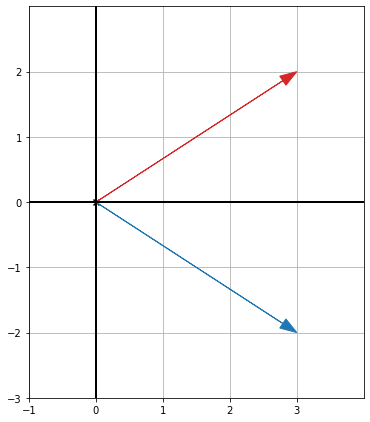

In [118]:
from draw2d import *

r = (3,2)
r_= Sx(r)

draw2d(
    Arrow2D(r, color=red),
    Arrow2D(r_, color=blue)
)


Draw two vectors and their sum, as well as the reflection of these three vectors to demonstrate that this transformation preserves vector addition. Draw another diagram to show similarly that scalar multiplication is preserved, thereby demonstrating both criteria for linearity.

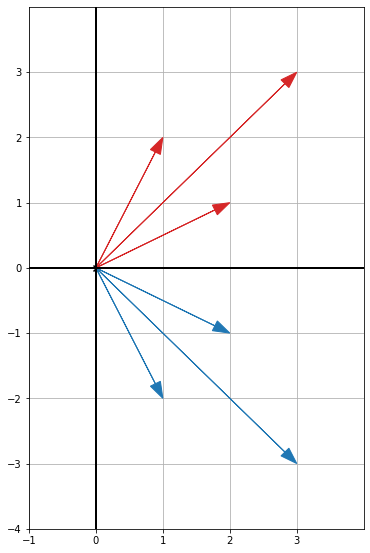

In [128]:
u = (2,1)
v = (1,2)

def Sx(vector):
    x,y = vector
    return x, y*(-1)

# T(u+v) = T(u) + T(v)
uv = add(u,v)
Sx_uv = Sx(uv)

u_ = Sx(u)
v_ = Sx(v)
uv_ = Sx(add(u,v))

assert Sx_uv == uv_

draw2d(
    Arrow2D(u),
    Arrow2D(v),
    Arrow2D(uv),
    Arrow2D(u_, color=blue),
    Arrow2D(v_, color=blue),
    Arrow2D(uv_, color=blue)
)

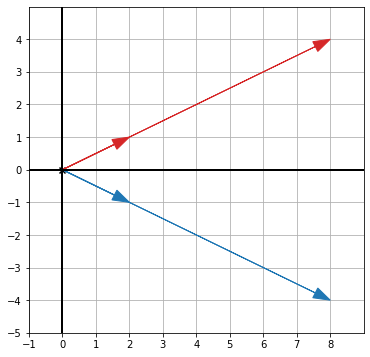

In [134]:
u = (2,1)
s = 4

def Sx(vector):
    x,y = vector
    return x, y*(-1)

su = scale(s, u)
Sx_su = Sx(scale(s,u))

u_ = Sx(u)
sv_ = Sx(scale(s,u))

assert Sx_su == sv_

draw2d(
    Arrow2D(u),
    Arrow2D(su),
    Arrow2D(u_, color=blue),
    Arrow2D(sv_, color=blue)
)

To prove that Sx is linear, you would need to show that you can draw analogous pictures for every vector sum and every scalar multiple. There are infinitely many of these, so it’s better to use an algebraic proof. (Can you figure out how to show these two facts algebraically?)

If $Sx = (x,-y)$ prove that $Sx(u + v) = Sx(u) + Sx(v)$ 
  
$Sx((u_x, u_y), (v_x, v_y)) = Sx(u_x, u_y) + Sx((v_x, v_y)$  
$Sx((u_x + v_x), (u_y + v_y)) = (u_x, -u_y) + (v_x, -v_y)$  
$(u_x + v_x), (-u_y - v_y) = (u_x + v_x), (-u_y - v_y)$


If $Sx = (x,-y)$ prove that $Sx(su) = sSx(u)$  
$Sx(s(u_x, u_y)) = sSx(u_x, u_y)$  
$(s(u_x), s(-u_y)) = s(u_x, -u_y)$  
$s(u_x, -u_y) = s(u_x, -u_y)$


**Mini-project 4.17:** Suppose S and T are both linear transformations. Explain why the composition of S and T is also linear.


**Solution:** The composition `S(T(v))` is linear if for any vector sum `u + v = w`, we have `S(T(u)) + S(T(v)) = S(T(w))`, and for any scalar multiple `sv`, we have `S(T(sv)) = s · S(T(v))`. 
**This is only a statement of the definition that must be satisfied.**

Now let’s see why it’s true. Suppose first that `u + v = w` for any given input vectors `u` and `v`. Then by the linearity of `T`, we also know that `T(u) + T(v) = T(w)`. Because this sum holds, the linearity of `S` tells us that the sum is preserved under `S: S(T(u)) + S(T(v)) = S(T(w))`. That means that `S(T(v))` preserves vector sums.

Similarly, for any scalar multiple `sv`, the linearity of `T` tells us that `s · T(v) = T(sv)`. By linearity of `S`, `s · S(T(v)) = S(T(sv))` as well. This means `S(T(v))` preserves scalar multiplication and, therefore, that `S(T(v))` satisfies the full definition of linearity as previously stated. We can conclude that **the composition of two linear transformations is linear.**


**Exercise 4.18:** Let T be the linear transformation done by the Python function rotate_x_by(pi/2), what are T(e1), T(e2), and T(e3)?


**Solution:** Any rotation about an axis leaves points on the axis unaffected, so because `T(e1)` is on the x-axis, `T(e1) = e1 = (1, 0, 0)`. A counterclockwise rotation of `e2 = (0, 1, 0)` in the `y,z` plane takes this vector from the point one unit in the positive y direction to the point one unit in the positive `z` direction, so `T(e2) = e3 = (0, 0, 1)`. Likewise, `e3` is rotated counterclockwise from the positive `z` direction to the negative `y` direction. `T(e3)` still has length one in this direction, so it is `-e2` or `(0, -1, 0)`.

**Exercise 4.19:** Write a `linear_combination(scalars, *vectors)` that takes a list of scalars and the same number of vectors, and returns a single vector. For example, `linear_combination([1,2,3], (1,0,0), (0,1,0), (0,0,1))` should return `1 · (1, 0, 0) + 2 · (0, 1, 0) + 3 · (0, 0, 1) or (1, 2, 3)`.

In [31]:
from transforms import *
from vectors import *

def linear_combiantion(scalars, *vectors):
    scaled = [scale(scalar, vector) for scalar, vector in zip(scalars, *vectors)]
    return add(*scaled)

In [32]:
s = [1,2,3]
v = [(1,0,0), (0,1,0), (0,0,1)]

linear_combiantion(s, v)

(1, 2, 3)

**Exercise 4.20:** Write a function `transform_standard_basis(transform)` that takes a 3D vector transformation as an input and outputs the effect it has on the standard basis. It should output a tuple of 3 vectors that are the results of transform acting on `e1`, `e2`, and `e3`, respectively.


In [61]:
def transform_standard_basis(transform):
    standard_basis = (1,0,0), (0,1,0), (0,0,1)
    return tuple([transform(vector) for vector in standard_basis])

In [63]:
from math import pi

transform_standard_basis(rotate_x_by(pi/2))

((1, 0.0, 0.0),
 (0, 6.123233995736766e-17, 1.0),
 (0, -1.0, 1.2246467991473532e-16))

**Exercise 4.21:** Suppose `B` is a linear transformation, with `B(e1) = (0, 0, 1)`, `B(e2) = (2, 1, 0)`, `B(e3) = (-1, 0, -1)`, and `v = (-1, 1, 2)`. What is `B(v)`?


**Solution:** `B(v) = -(0, 0, 1) + (2, 1, 0) + 2 · (-1, 0, -1) = (0, 1, -3)`.

**Exercise 4.22:** Suppose `A` and `B` are both linear transformations with `A(e1) = (1, 1, 1)`, `A(e2) = (1, 0, -1)`, and `A(e3) = (0, 1, 1)`, and `B(e1) = (0, 0, 1)`, `B(e2) = (2, 1, 0)`, and `B(e3) = (-1, 0, -1)`. What is `A(B(e1))`, `A(B(e2))`, and `A(B(e3))`?
